In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib as mpl
import joblib
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
# tensorflow 용 시간체크와 tqdm
!pip install tensorflow-addons
import tqdm
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 14.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


#### navie forecast Base 모델부터 시작

In [65]:
# sin 함수로 예측
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time-offsets1)*(freq1 * 10 + 10))
  series += 0.3 * np.sin((time-offsets2)*(freq2 * 30 + 30))
  series += 0.2 * (np.random.rand(batch_size, n_steps)-0.5)
  return series[..., np.newaxis].astype(np.float32)

In [66]:
n_steps= 50
series = generate_time_series(10000, n_steps+1)

In [67]:
# 훈련셋 분리
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [68]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [28]:
# 그래프 정의
def plot_series(series, y=None, y_pred=None, x_label="$s$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

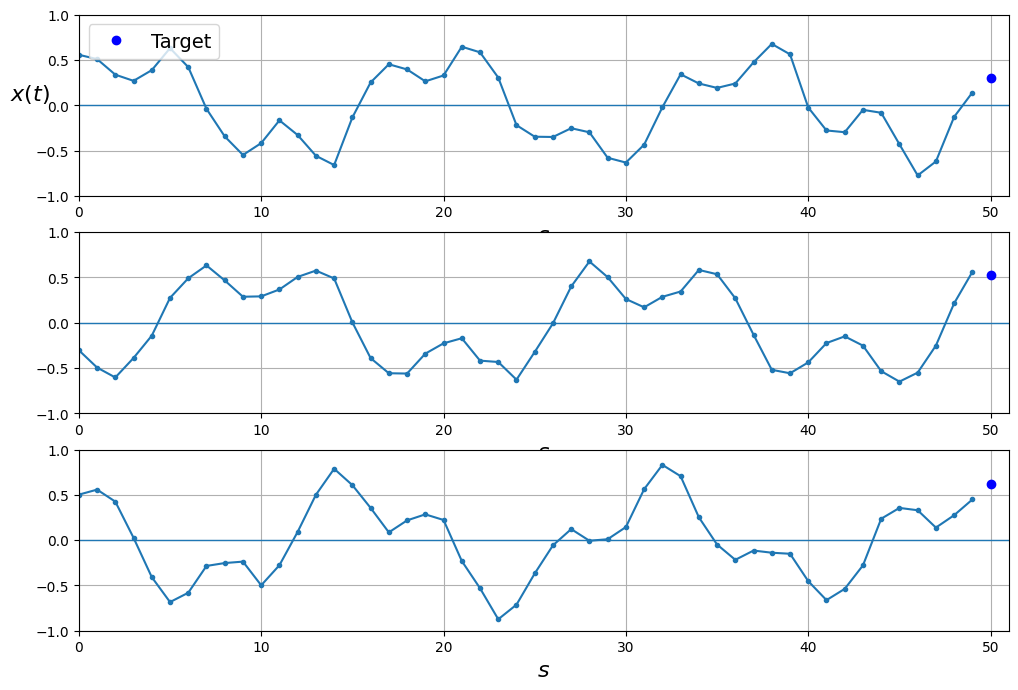

In [29]:
# 시각화
fig, axes = plt.subplots(nrows=3, ncols=1, sharey=True, figsize=(12, 8))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

#### 기준성능 계산

In [69]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))
# 마지막값으로 예측

0.05318755

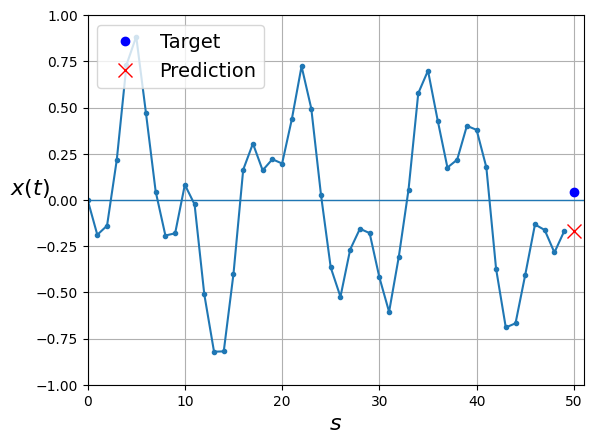

In [70]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0,0])
plt.show()

In [71]:
# 모델 로드

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
# 컴파일
model.compile(loss="mse", optimizer="adam")

In [72]:
# 학습 25회부터 시작
history = model.fit(X_train, y_train, epochs = 25, validation_data=
                    (X_valid, y_valid), callbacks=tqdm_callback)

Training:   0%|           0/25 ETA: ?s,  ?epochs/s

Epoch 1/25


0/219           ETA: ?s - 

Epoch 1/25
219/219 [==============================] - 3s 6ms/step - loss: 0.2795 - val_loss: 0.1310
Epoch 2/25


0/219           ETA: ?s - 

Epoch 2/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0892 - val_loss: 0.0663
Epoch 3/25


0/219           ETA: ?s - 

Epoch 3/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0487 - val_loss: 0.0421
Epoch 4/25


0/219           ETA: ?s - 

Epoch 4/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0337 - val_loss: 0.0324
Epoch 5/25


0/219           ETA: ?s - 

Epoch 5/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0276 - val_loss: 0.0277
Epoch 6/25


0/219           ETA: ?s - 

Epoch 6/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0245 - val_loss: 0.0251
Epoch 7/25


0/219           ETA: ?s - 

Epoch 7/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0226 - val_loss: 0.0234
Epoch 8/25


0/219           ETA: ?s - 

Epoch 8/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0211 - val_loss: 0.0219
Epoch 9/25


0/219           ETA: ?s - 

Epoch 9/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0199 - val_loss: 0.0207
Epoch 10/25


0/219           ETA: ?s - 

Epoch 10/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0190 - val_loss: 0.0196
Epoch 11/25


0/219           ETA: ?s - 

Epoch 11/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0181 - val_loss: 0.0186
Epoch 12/25


0/219           ETA: ?s - 

Epoch 12/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0174 - val_loss: 0.0180
Epoch 13/25


0/219           ETA: ?s - 

Epoch 13/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0168 - val_loss: 0.0174
Epoch 14/25


0/219           ETA: ?s - 

Epoch 14/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0164 - val_loss: 0.0168
Epoch 15/25


0/219           ETA: ?s - 

Epoch 15/25
219/219 [==============================] - 1s 4ms/step - loss: 0.0159 - val_loss: 0.0164
Epoch 16/25


0/219           ETA: ?s - 

Epoch 16/25
219/219 [==============================] - 1s 4ms/step - loss: 0.0154 - val_loss: 0.0159
Epoch 17/25


0/219           ETA: ?s - 

Epoch 17/25
219/219 [==============================] - 1s 4ms/step - loss: 0.0151 - val_loss: 0.0156
Epoch 18/25


0/219           ETA: ?s - 

Epoch 18/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0152
Epoch 19/25


0/219           ETA: ?s - 

Epoch 19/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0146 - val_loss: 0.0149
Epoch 20/25


0/219           ETA: ?s - 

Epoch 20/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0144 - val_loss: 0.0147
Epoch 21/25


0/219           ETA: ?s - 

Epoch 21/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0145
Epoch 22/25


0/219           ETA: ?s - 

Epoch 22/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0140 - val_loss: 0.0143
Epoch 23/25


0/219           ETA: ?s - 

Epoch 23/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0138 - val_loss: 0.0142
Epoch 24/25


0/219           ETA: ?s - 

Epoch 24/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0138 - val_loss: 0.0142
Epoch 25/25


0/219           ETA: ?s - 

Epoch 25/25
219/219 [==============================] - 1s 3ms/step - loss: 0.0137 - val_loss: 0.0139


In [73]:
# 평가 점수
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0139


0.013908959925174713

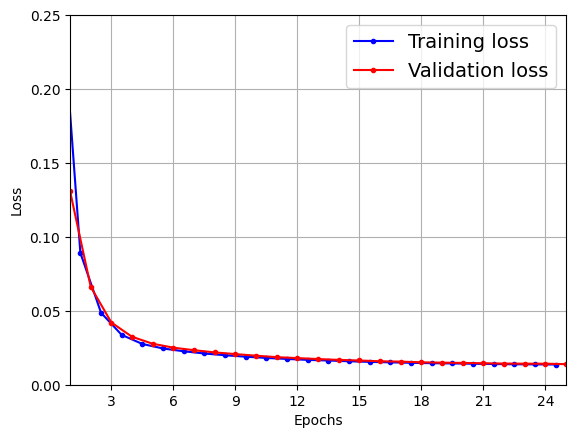

In [77]:
# loss 시각화
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 25, 0, 0.25])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 0s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

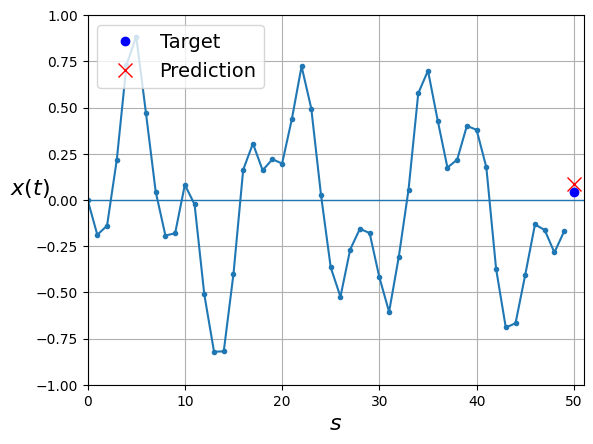

In [79]:
# 예측값에 대한 시각화
y_pred = model.predict(X_valid)
plot_series(X_valid[0,:,0], y_valid[0,0], y_pred[0,0])
plt.show

#### Base RNN 모델 제작

In [ ]:
# 모델 로드

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1]),
])
# 컴파일
optimizer = keras.optimizers.Nadam(learning_rate=0.002, decay=0.004)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])